In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X_train = np.arange(0,100,0.5) 
y_train = np.sin(X_train)

X_test = np.arange(100,200,0.5) 
y_test = np.sin(X_test)

# we have only one variable to forecast
# => sine wave
n_features = 1

# the shapes of these (200, 1)
# we'll have to check these out again, when
# we change into a csv-dataset
train_series = y_train.reshape((len(y_train), n_features))
test_series  = y_test.reshape((len(y_test), n_features))

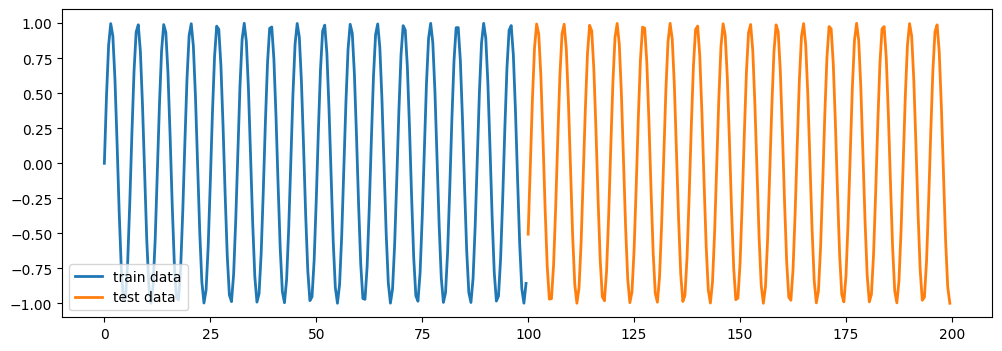

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.plot(X_train, y_train, lw=2, label='train data')
ax.plot(X_test, y_test,  lw=2, label='test data')
ax.legend(loc="lower left")
plt.show() 

In [4]:
# TimeseriesGenerators, for train and test
from keras.preprocessing.sequence import TimeseriesGenerator

# this is the time step size
# so if we have 1000 points, and look_back is 20 => 50 time steps
look_back  = 20

# using 1 => using time steps
# anything over 1 => using windowing
window_size = 1

# the amount of data fed to the neural network
# while training. the bigger it is, faster the training
# but with forecasts it also affects the performance
batch_size = 10

train_generator = TimeseriesGenerator(train_series, train_series,
                                      length        = look_back, 
                                      # sampling_rate = 1,
                                      stride        = window_size,
                                      batch_size    = batch_size)

test_generator = TimeseriesGenerator(test_series, test_series,
                                      length        = look_back, 
                                      # sampling_rate = 1,
                                      stride        = window_size,
                                      batch_size    = batch_size)

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import SimpleRNN

n_neurons  = 4
model = Sequential()
model.add(LSTM(n_neurons, input_shape=(look_back, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(train_generator,epochs=300, verbose=1, validation_data=test_generator)



Epoch 1/300

18/18 [==============================] - 5s 72ms/step - loss: 0.4615 - val_loss: 0.4413
Epoch 2/300
18/18 [==============================] - 0s 21ms/step - loss: 0.4323 - val_loss: 0.4118
Epoch 3/300
18/18 [==============================] - 0s 24ms/step - loss: 0.4012 - val_loss: 0.3825
Epoch 4/300
18/18 [==============================] - 0s 19ms/step - loss: 0.3698 - val_loss: 0.3513
Epoch 5/300
18/18 [==============================] - 1s 35ms/step - loss: 0.3373 - val_loss: 0.3162
Epoch 6/300
18/18 [==============================] - 1s 34ms/step - loss: 0.3013 - val_loss: 0.2791
Epoch 7/300
18/18 [==============================] - 1s 33ms/step - loss: 0.2623 - val_loss: 0.2398
Epoch 8/300
18/18 [==============================] - 1s 33ms/step - loss: 0.2212 - val_loss: 0.1984
Epoch 9/300
18/18 [==============================] - 0s 12ms/step - loss: 0.1798 - val_loss: 0.1572
Epoch 10/300
18/18 [==============================] - 0s 21ms/step - loss: 0.1395 - val_loss: 0.1

<Axes: >

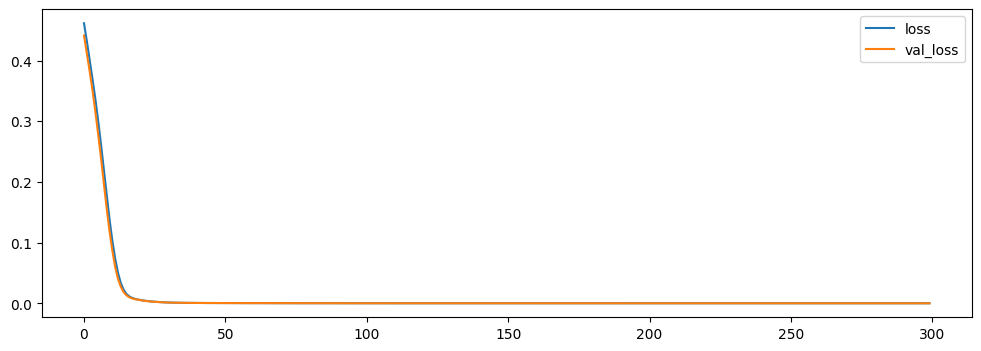

In [6]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12, 4))

In [7]:
test_predictions  = model.predict(test_generator)

18/18 [==============================] - 1s 3ms/step


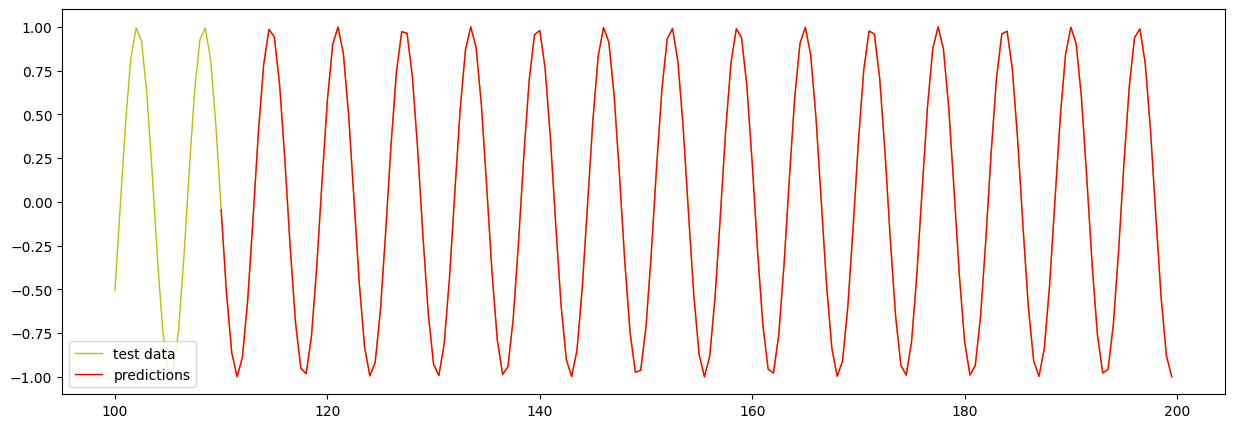

In [8]:
x = np.arange(110,200,0.5)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
# ax.plot(X_train,y_train, lw=1, label='train data')
ax.plot(X_test,y_test, lw=1, c='y', label='test data')
ax.plot(x,test_predictions, lw=1, c='r', label='predictions')
ax.legend(loc="lower left")
plt.show()

In [9]:
from keras.models import Sequential
from keras.layers import Dense

# rule of thumb: RNN is usually good with short-term trends
# while LSTM is usually good with long-term trends
# depends on the situation which one suits your dataset better
from keras.layers import LSTM
from keras.layers import SimpleRNN

# make a simple LSTM -network
# you can adjust the number of neurons
# you can also try SimpleRNN
model = Sequential()
model.add(LSTM(8, input_shape=(look_back, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# start training the data, use also validation data for metrics later
model.fit(train_generator, epochs=300, verbose=1, validation_data=test_generator)

Epoch 1/300
18/18 [==============================] - 4s 63ms/step - loss: 0.6004 - val_loss: 0.5756
Epoch 2/300
18/18 [==============================] - 1s 30ms/step - loss: 0.5656 - val_loss: 0.5421
Epoch 3/300
18/18 [==============================] - 1s 37ms/step - loss: 0.5318 - val_loss: 0.5098
Epoch 4/300
18/18 [==============================] - 1s 35ms/step - loss: 0.4991 - val_loss: 0.4769
Epoch 5/300
18/18 [==============================] - 1s 35ms/step - loss: 0.4652 - val_loss: 0.4416
Epoch 6/300
18/18 [==============================] - 1s 36ms/step - loss: 0.4260 - val_loss: 0.3971
Epoch 7/300
18/18 [==============================] - 0s 20ms/step - loss: 0.3731 - val_loss: 0.3315
Epoch 8/300
18/18 [==============================] - 0s 24ms/step - loss: 0.2934 - val_loss: 0.2227
Epoch 9/300
18/18 [==============================] - 1s 34ms/step - loss: 0.1623 - val_loss: 0.1150
Epoch 10/300
18/18 [==============================] - 1s 35ms/step - loss: 0.1015 - val_loss: 0.0876

In [10]:
# TF evaluation metrics
result = model.evaluate(train_generator)
print(f"Training loss: {result}")

# test loss
result = model.evaluate(test_generator)
print(f"Testing loss: {result}")

# these values are very close, which means our model is quite optimal
# ON PAPER

18/18 [==============================] - 0s 9ms/step - loss: 8.0804e-07
Training loss: 8.080381235231471e-07
18/18 [==============================] - 0s 8ms/step - loss: 8.0630e-07
Testing loss: 8.062964980126708e-07


In [11]:
from sklearn import metrics
# make a separate copy of the test values
# that matches with y_test
actual_y_test = np.concatenate([y for x, y in test_generator])
errors = np.abs(actual_y_test - test_predictions)
mape = np.mean(errors / actual_y_test) * 100

# print out MAPE-score
print("MAPE (mean average precision error):")
print(f"{round(mape, 2)} %")

# the typical error metrics
# MAE - Mean average error
# MAPE score => less than 10% => excellent result
# MAPE score => 10-20 % => good result
# MAPE score => 20-50% => okay / reasonable / decent result
# negative MAPE score => the model constantly overestimates the values
# MAPE score over 100% => the model constantly underestimates the values
# it's possible to get a weird MAPE result with synthetic test data
# because the data is so predicatble
print("\nMAE")
print(round(metrics.mean_absolute_error(actual_y_test , test_predictions), 2), " units")

# MSE - Mean square error
print("\nMSE")
print(round(metrics.mean_squared_error(actual_y_test, test_predictions), 2), " units^2")

# RMSE - Root mean square error
print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(actual_y_test , test_predictions)), 2), " units")

# R-squared. 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
print('\nR-squared:')
print(round(metrics.r2_score(actual_y_test , test_predictions), 2))

MAPE (mean average precision error):
0.09 %

MAE
0.0  units

MSE
0.0  units^2

RMSE:
0.0  units

R-squared:
1.0


In [12]:
 # EXTRAPOLATION TEST 1 - 180 points
extrapolation = list()
seed_batch    = y_test[:look_back].reshape((1,look_back, n_features))
current_batch = seed_batch

# extrapolate the next 180 values
for i in range(180):
    predicted_value = model.predict(current_batch)[0]
    extrapolation.append(predicted_value) 
    current_batch = np.append(current_batch[:,1:,:],[[predicted_value]],axis=1)

1/1 [==============================] - 0s 47ms/step


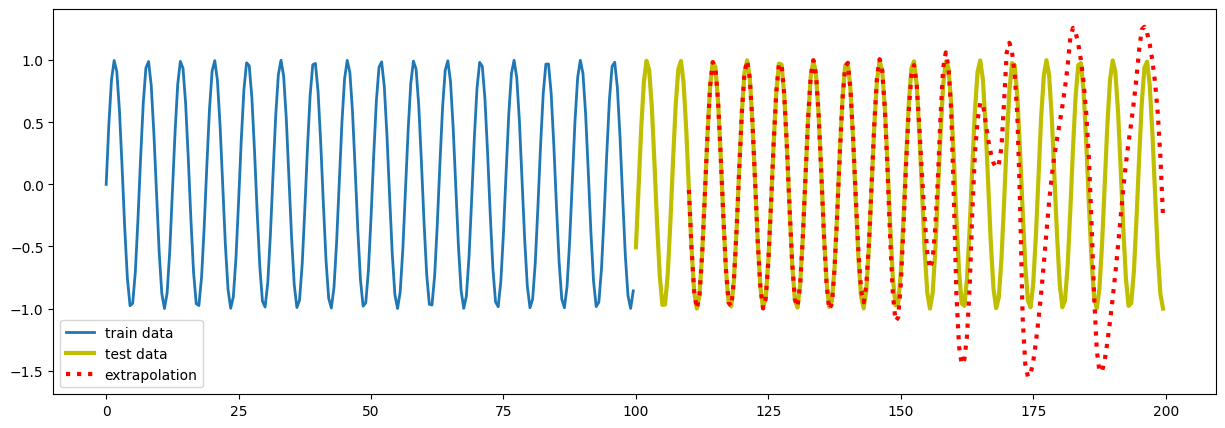

In [13]:
x = np.arange(110,200,0.5)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(X_train,y_train, lw=2, label='train data')
ax.plot(X_test,y_test, lw=3, c='y', label='test data')
ax.plot(x,extrapolation, lw=3, c='r',linestyle = ':', label='extrapolation')
ax.legend(loc="lower left")
plt.show()

In [14]:
# EXTRAPOLATION TEST 2 - 320 points
extrapolation = list()
seed_batch    = y_test[:look_back].reshape((1,look_back, n_features))
current_batch = seed_batch

# extrapolate the next 180 values
for i in range(320):
    predicted_value = model.predict(current_batch)[0]
    extrapolation.append(predicted_value) 
    current_batch = np.append(current_batch[:,1:,:],[[predicted_value]],axis=1)

1/1 [==============================] - 0s 91ms/step


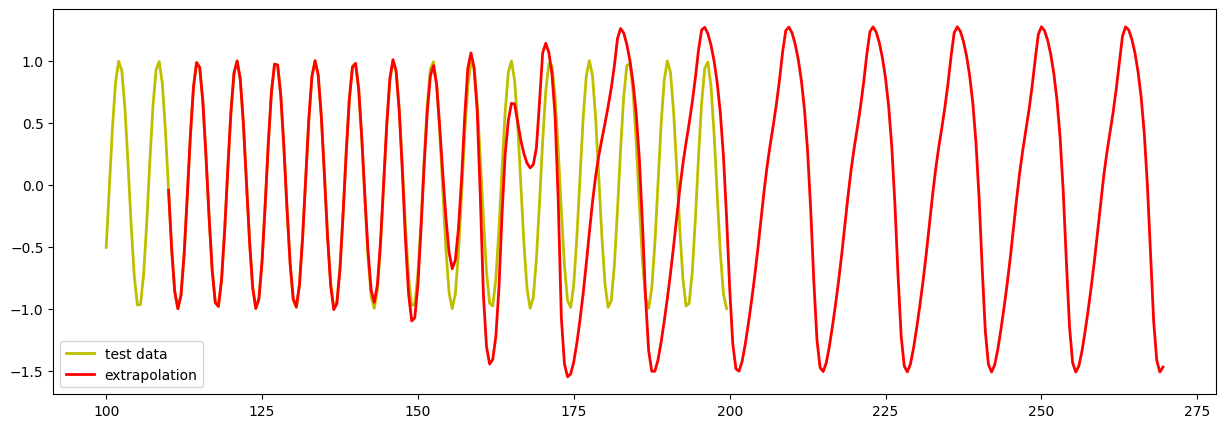

In [15]:
x = np.arange(110,270,0.5)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
# ax.plot(X_train,y_train, lw=2, label='train data')
ax.plot(X_test,y_test, lw=2, c='y', label='test data')
ax.plot(x,extrapolation, lw=2, c='r', label='extrapolation')
ax.legend(loc="lower left")
plt.show()